In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import seaborn as sns #visualisation


In [3]:
# import data set from the local driver


df1=pd.read_csv('drive/My Drive/Colab Notebooks/train1.csv', sep=';' )# , engine='python')
df2=pd.read_csv('drive/My Drive/Colab Notebooks/train2.csv', sep=';' )
df3=pd.read_csv('drive/My Drive/Colab Notebooks/test1.csv', sep=';' )
df4=pd.read_csv('drive/My Drive/Colab Notebooks/test2.csv', sep=';' )

frames = [df1,df2,df3,df4]
df_concat=pd.concat(frames)
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)



The dataset has 995400 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0


In [4]:
#df_concat.shape

In [5]:
#df_concat.to_csv(r'/home/jovyan/HAI-HIL dataset.csv',index=False)

In [6]:
# drop the columns that are under attack in each stage.
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)

In [8]:
# make the Timestamp to datetime datatype
df1['time'] = pd.to_datetime(df1['time']) # conveting the date time stamp to the timestamp series
df1.head(2)
# # df1.shape

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0


In [9]:
df1.fillna(method = 'ffill', inplace = True)

In [10]:
# a Timestamp as index
df1= df1.set_index('time')
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


##### Interpolation the data with each time stamp  

In [11]:
# resample the data with 5 second
df1=df1.resample('5s').mean()
df1.interpolate(method='polynomial',order=2)
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.07066,399.2321,1110.3986,32.0,0.00000,29.99130,35.74112,0.0,0.28380,...,59.15078,0.0,398.21684,0.00100,331.52488,330.05640,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:05,0.0983,1.07744,399.2321,1110.3986,32.0,0.00000,32.17604,35.76378,0.0,0.28380,...,61.78386,0.0,403.16116,-0.00058,335.64090,332.40380,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:10,0.0983,1.08406,399.2321,1110.3986,32.0,0.00000,30.38848,35.78582,0.0,0.28532,...,63.72974,0.0,407.63166,-0.00082,338.82016,334.41118,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:15,0.0983,1.08908,399.2321,1110.3986,32.0,0.00000,32.57336,35.80254,0.0,0.28228,...,65.19456,0.0,408.92652,-0.00180,340.52374,336.76214,50.9871,9973.0,27628.6,0.0
2019-09-11 20:00:20,0.0983,1.09910,399.2321,1110.3986,32.0,0.00152,30.98438,35.83596,0.0,0.28380,...,66.17658,0.0,410.77836,-0.00118,342.62154,338.71164,50.9871,9973.0,27629.0,0.0


In [12]:
df1.shape

(960120, 60)

In [13]:
# Count NaN values of whole DataFrame
nan_count = df1.isna().sum()#.sum()
print(nan_count )

P1_B2004      761040
P1_B2016      761040
P1_B3004      761040
P1_B3005      761040
P1_B4002      761040
P1_B4005      761040
P1_B400B      761040
P1_B4022      761040
P1_FCV01D     761040
P1_FCV01Z     761040
P1_FCV02D     761040
P1_FCV02Z     761040
P1_FCV03D     761040
P1_FCV03Z     761040
P1_FT01       761040
P1_FT01Z      761040
P1_FT02       761040
P1_FT02Z      761040
P1_FT03       761040
P1_FT03Z      761040
P1_LCV01D     761040
P1_LCV01Z     761040
P1_LIT01      761040
P1_PCV01D     761040
P1_PCV01Z     761040
P1_PCV02D     761040
P1_PCV02Z     761040
P1_PIT01      761040
P1_PIT02      761040
P1_TIT01      761040
P1_TIT02      761040
P2_24Vdc      761040
P2_Auto       761040
P2_Emgy       761040
P2_On         761040
P2_SD01       761040
P2_SIT01      761040
P2_TripEx     761040
P2_VT01e      761040
P2_VXT02      761040
P2_VXT03      761040
P2_VYT02      761040
P2_VYT03      761040
P3_LCP01D     761040
P3_LCV01D     761040
P3_LH         761040
P3_LL         761040
P3_LT01      

In [14]:
df1.fillna(method = 'ffill', inplace = True)

In [15]:
df1.shape

(960120, 60)

#### Visualize the dataset
-  Plotting the number of normal and Attack transactions in the dataset.  

None


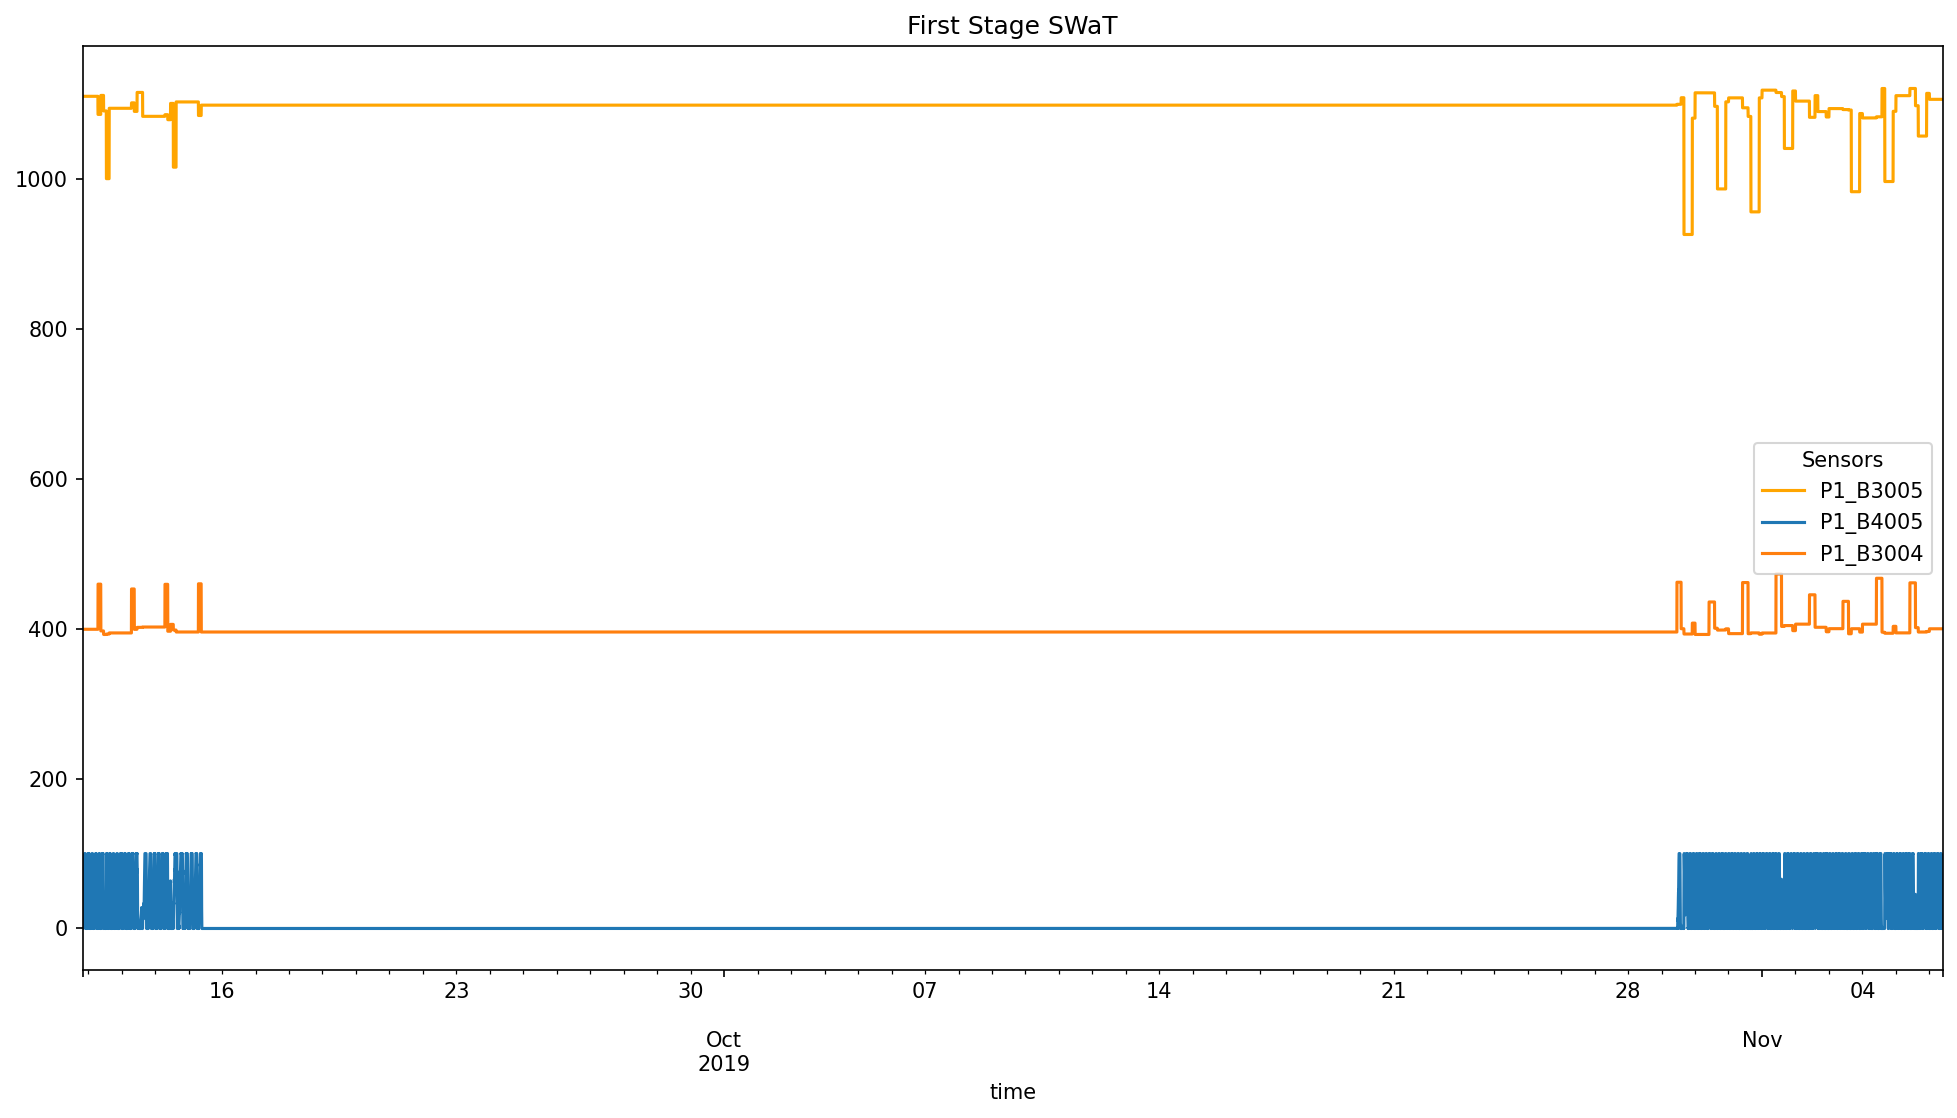

In [16]:
# Visualizing The first stage with respect to time series
def plot ():
    plt.figure(figsize=(16, 8), dpi=150)
    df1['P1_B3005'].plot(label='P1_B3005', color='orange')
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004')
    # adding title to the plot
    plt.title('First Stage SWaT')
    # adding Label to the x-axis
    plt.xlabel('time')
    # adding legend to the curve
    plt.legend(title='Sensors')

print (plot ())


In [17]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['attack'] >= 0.1, 'lablel'] = 1
df1.loc[df1['attack'] ==0.0, 'lablel'] = 0

In [18]:
# fill the missing values with forward and backward of the cols

df1=df1.fillna(method="ffill")

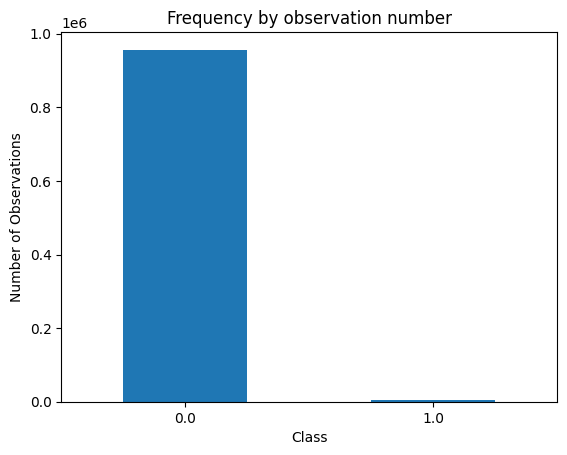

In [19]:
#Visualizing the imbalanced dataset
count_classes2 = pd.value_counts(df1['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [20]:
df1.shape

(960120, 61)

In [21]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with features and target variable
X = df1.drop('lablel', axis=1)
y = df1['lablel']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,lablel
0,0.0983,1.07066,399.2321,1110.3986,32.0,0.00000,29.99130,35.74112,0.0,0.28380,...,0.0,398.21684,0.00100,331.52488,330.05640,50.9871,9973.0,27629.0,0.0,0.0
1,0.0983,1.07744,399.2321,1110.3986,32.0,0.00000,32.17604,35.76378,0.0,0.28380,...,0.0,403.16116,-0.00058,335.64090,332.40380,50.9871,9973.0,27629.0,0.0,0.0
2,0.0983,1.08406,399.2321,1110.3986,32.0,0.00000,30.38848,35.78582,0.0,0.28532,...,0.0,407.63166,-0.00082,338.82016,334.41118,50.9871,9973.0,27629.0,0.0,0.0
3,0.0983,1.08908,399.2321,1110.3986,32.0,0.00000,32.57336,35.80254,0.0,0.28228,...,0.0,408.92652,-0.00180,340.52374,336.76214,50.9871,9973.0,27628.6,0.0,0.0
4,0.0983,1.09910,399.2321,1110.3986,32.0,0.00152,30.98438,35.83596,0.0,0.28380,...,0.0,410.77836,-0.00118,342.62154,338.71164,50.9871,9973.0,27629.0,0.0,0.0


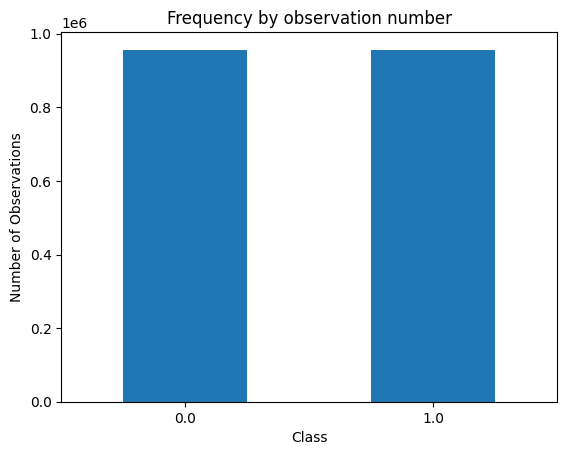

In [22]:
#Visualizing the balanced dataset
count_classes2 = pd.value_counts(df_resampled['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df_resampled['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [23]:
df_resampled.isna().sum()

P1_B2004      0
P1_B2016      0
P1_B3004      0
P1_B3005      0
P1_B4002      0
             ..
P4_ST_PS      0
P4_ST_PT01    0
P4_ST_TT01    0
attack        0
lablel        0
Length: 61, dtype: int64

In [24]:
#Count 1 unique values in each columns
df2=df_resampled.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1]

,feature,number Of unique
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [25]:
# drop the  cols
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0)

# drop two columns name is 'C' and 'D'
df1=df_resampled.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS','attack'], axis=1)

In [26]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
c=c.lablel.sort_values(ascending=False).head(42).keys().drop('lablel') # corelation
print(c)

Index(['P1_B2004', 'P1_B2016', 'P1_PCV01D', 'P1_PCV01Z', 'P4_ST_PO',
       'P4_ST_LD', 'P4_LD', 'P3_LCV01D', 'P4_HT_PO', 'P4_HT_LD', 'P1_B3004',
       'P1_PIT01', 'P1_FT01', 'P1_FT01Z', 'P1_FT02Z', 'P1_B400B', 'P1_B4005',
       'P4_ST_PT01', 'P1_FCV01D', 'P1_FT02', 'P1_FCV01Z', 'P1_PIT02',
       'P4_ST_FD', 'P1_FCV03D', 'P1_FCV03Z', 'P1_LIT01', 'P1_PCV02Z',
       'P1_PCV02D', 'P4_HT_FD', 'P1_LCV01D', 'P1_LCV01Z', 'P1_B3005',
       'P1_FT03', 'P1_FT03Z', 'P1_B4022', 'P4_ST_PS', 'P1_FCV02D', 'P1_FCV02Z',
       'P1_TIT02', 'P1_B4002', 'P2_SIT01'],
      dtype='object')


In [28]:
# Select Multiple Columns
df2 = df1.loc[:,['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03','lablel']]

In [29]:
df2.shape

(1912868, 42)

In [30]:
#To see how the data is spread betwen Attack and Normal
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count())
print(df2.groupby('lablel')['lablel'].count())

lablel
0.0    956434
1.0    956434
Name: lablel, dtype: int64


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912868 entries, 0 to 1912867
Data columns (total 42 columns):
 #   Column      Dtype  
---  ------      -----  
 0   P1_FCV03D   float64
 1   P1_FCV03Z   float64
 2   P1_PCV02D   float64
 3   P1_FT01     float64
 4   P1_PCV01D   float64
 5   P1_PCV01Z   float64
 6   P1_PCV02Z   float64
 7   P1_B2016    float64
 8   P1_B2004    float64
 9   P1_FT01Z    float64
 10  P4_ST_LD    float64
 11  P4_ST_PO    float64
 12  P4_LD       float64
 13  P3_LCV01D   float64
 14  P1_PIT01    float64
 15  P4_ST_PT01  float64
 16  P4_HT_PO    float64
 17  P4_HT_LD    float64
 18  P1_B400B    float64
 19  P1_FT02Z    float64
 20  P1_B4005    float64
 21  P1_FT02     float64
 22  P4_ST_FD    float64
 23  P1_PIT02    float64
 24  P1_FCV01D   float64
 25  P1_FCV01Z   float64
 26  P1_B3004    float64
 27  P4_HT_FD    float64
 28  P1_LIT01    float64
 29  P1_B3005    float64
 30  P4_ST_PS    float64
 31  P1_FT03     float64
 32  P1_FT03Z    float64
 33  P1_FCV0

#### Normalize using min Max scaler  

In [32]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03']
scaler = MinMaxScaler()
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()

,P1_FCV03D,P1_FCV03Z,P1_PCV02D,P1_FT01,P1_PCV01D,P1_PCV01Z,P1_PCV02Z,P1_B2016,P1_B2004,P1_FT01Z,...,P1_FT03Z,P1_FCV02Z,P1_FCV02D,P1_LCV01Z,P2_VYT02,P1_LCV01D,P3_LCP01D,P2_VXT02,P2_VXT03,lablel
0,0.535996,0.542189,0.0,0.180225,0.352078,0.356192,0.028615,0.488575,0.950413,0.384937,...,0.539344,0.988342,1.0,0.194136,0.579161,0.201525,0.041536,0.741683,0.742327,0.0
1,0.537235,0.536428,0.0,0.180781,0.352120,0.356192,0.028504,0.491991,0.950413,0.382960,...,0.537709,0.988589,1.0,0.194136,0.581788,0.203004,0.032370,0.752779,0.748738,0.0
2,0.537609,0.534039,0.0,0.182960,0.352401,0.356192,0.028504,0.495327,0.950413,0.389221,...,0.536908,0.988342,1.0,0.194152,0.594078,0.204786,0.025190,0.753270,0.750750,0.0
3,0.538088,0.534024,0.0,0.172621,0.352580,0.356192,0.028615,0.497856,0.950413,0.366701,...,0.535952,0.988342,1.0,0.194136,0.601863,0.206526,0.019618,0.750678,0.752949,0.0
4,0.538332,0.534024,0.0,0.176191,0.353464,0.356192,0.028504,0.502905,0.950413,0.371205,...,0.535952,0.988404,1.0,0.194136,0.608842,0.207946,0.015302,0.752170,0.758767,0.0


In [33]:
# # Taking a random sample of 20% of the data
# df2 = df2.sample(frac=0.1, random_state=42)
# df2.shape

#### Split the Data to train and Test  

In [34]:
# split the normal data with respect to test and Train
from sklearn.model_selection import train_test_split
x_good_train, x_good_test = train_test_split(df2, test_size=0.2, random_state=42)

In [35]:
print(x_good_train.shape)
print(x_good_test.shape)

(1530294, 42)
(382574, 42)


In [36]:
# Training and testing with removing the class
x_good_train = x_good_train[x_good_train.lablel == 0.0] #where normal transactions
x_good_train = x_good_train.drop(['lablel'], axis=1) #drop the class columns

test_y = x_good_test['lablel'] # save the class column for the test set
x_good_test = x_good_test.drop(['lablel'], axis=1) #drop the class column

x_good_train = x_good_train.values #transform to ndarray
x_good_test = x_good_test.values
x_good_train.shape, x_good_test.shape #,x_good_train.shape,test_y.shape

((765430, 41), (382574, 41))

#### Build Model   

In [37]:
#########
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
import datetime

In [39]:
#TIME_STEPS = 288
model = Sequential()
# encoder
model.add(Dense(41, input_dim=x_good_train.shape[1], activation='sigmoid')) # Input layers or encoder sigmoid relu
Dropout(0.01),
model.add(Dense(16, activation='sigmoid')) ##
Dropout(0.01),
# model.add(Dense(32, activation='relu')) ##
# Dropout(0.1),

# model.add(Dense(41, activation='sigmoid')) ## decoder
# Dropout(0.1),
model.add(Dense(x_good_train.shape[1])) # output layers
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 41)                1722      
                                                                 
 dense_5 (Dense)             (None, 16)                672       
                                                                 
 dense_6 (Dense)             (None, 41)                697       
                                                                 
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
_________________________________________________________________


### Train the model
Please note that we are using x_good_test as both the input and the target since this is a reconstruction model.

In [40]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100)
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=15,
    batch_size=32,
    validation_data=(x_good_test, x_good_test),
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0])
print('accuracy:', score[1])

Epoch 1/15
23920/23920 - 55s - loss: 0.0258 - accuracy: 0.7232 - val_loss: 0.0201 - val_accuracy: 0.7306 - 55s/epoch - 2ms/step
Epoch 2/15
23920/23920 - 60s - loss: 0.0197 - accuracy: 0.9234 - val_loss: 0.0201 - val_accuracy: 0.7529 - 60s/epoch - 3ms/step
Epoch 3/15
23920/23920 - 54s - loss: 0.0197 - accuracy: 0.9271 - val_loss: 0.0199 - val_accuracy: 0.6957 - 54s/epoch - 2ms/step
Epoch 4/15
23920/23920 - 53s - loss: 0.0197 - accuracy: 0.9349 - val_loss: 0.0196 - val_accuracy: 0.7248 - 53s/epoch - 2ms/step
Epoch 5/15
23920/23920 - 55s - loss: 0.0197 - accuracy: 0.9367 - val_loss: 0.0195 - val_accuracy: 0.7605 - 55s/epoch - 2ms/step
Epoch 6/15
23920/23920 - 57s - loss: 0.0197 - accuracy: 0.9368 - val_loss: 0.0195 - val_accuracy: 0.7479 - 57s/epoch - 2ms/step
Epoch 7/15
23920/23920 - 52s - loss: 0.0197 - accuracy: 0.9375 - val_loss: 0.0195 - val_accuracy: 0.7846 - 52s/epoch - 2ms/step
Epoch 8/15
23920/23920 - 61s - loss: 0.0197 - accuracy: 0.9382 - val_loss: 0.0195 - val_accuracy: 0.7761

#### Plot training and test loss  

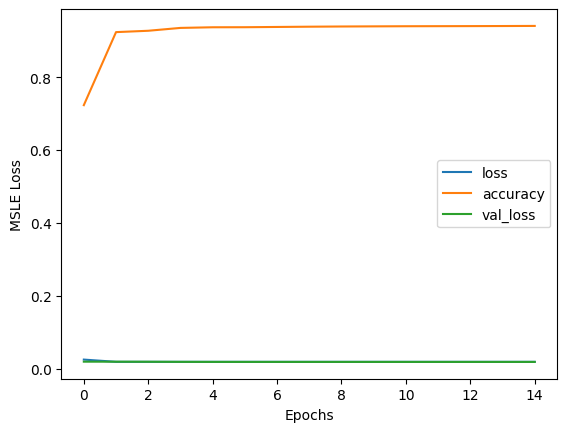

In [41]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['accuracy'])
plt.plot(grid.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss','accuracy', 'val_loss'])
plt.show()

### Detect Anomalies on test data  
- Anomalies are data points where the reconstruction loss is higher
- To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data.

#### Predictions and Computing Reconstruction Error  

In [42]:
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions,2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)
error_df.head()

11956/11956 [==============================] - 19s 2ms/step


,Reconstruction_error,A
874686,0.156960,0.0
853379,0.074651,0.0
1330364,0.097610,1.0
1534496,0.083256,1.0
192080,0.102732,0.0


In [43]:
# find the maximum of each column using reconstruction error
maxValues = error_df.max()

print(maxValues)

Reconstruction_error    0.240294
A                       1.000000
dtype: float64


In [44]:

# To identify the maximum and minimum data point for identifying bins
import tensorflow as tf
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss1 = tf.keras.losses.mse(test_x_predictions, x_good_test)


trainloss1=pd.DataFrame(train_loss1)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False)
trainloss1.describe()


,0
count,382574.000000
mean,0.112245
std,0.020510
min,0.054037
25%,0.102732
50%,0.102732
75%,0.124984
max,0.240294


Text(0.5, 1.0, 'bins - loss distribution = 37')

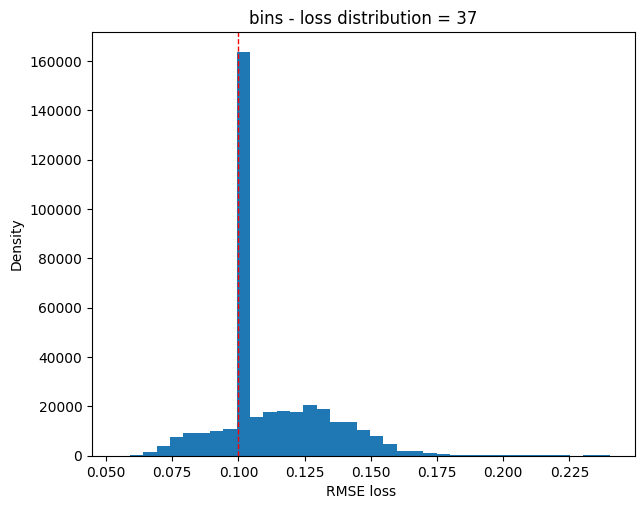

In [45]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule
trainloss1=pd.DataFrame(trainloss1)
q1 = trainloss1.quantile(0)
q3 = trainloss1.quantile(1)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(trainloss1) ** (1 / 3))
bin_count = int(np.ceil((trainloss1.max() - trainloss1.min()) / bin_width))
fig = plt.figure(figsize=(7,5.5))
plt.hist(train_loss1, bins = bin_count)

plt.axvline(0.1,0, 9000,color='red', linestyle='dashed', linewidth=1)
plt.xlabel('RMSE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}')

### Model Interpretability  

In [46]:
# change X_tes_scaled to pandas dataframe
data_n = pd.DataFrame(x_good_test, index= test_y.index)#, columns=numerical_cols)

In [47]:
def compute_error_per_dim(point):

    initial_pt = np.array(data_n.loc[point,:]).reshape(1,9)
    reconstrcuted_pt = model.predict(initial_pt)

    return abs(np.array(initial_pt - reconstrcuted_pt)[0])

In [48]:
outliers = error_df.index[error_df.Reconstruction_error > 0.150].tolist()
number_of_outliers = len(outliers)
print("Number of elements in the anomalies: ", number_of_outliers)

Number of elements in the anomalies:  19156


<Figure size 1800x1000 with 0 Axes>

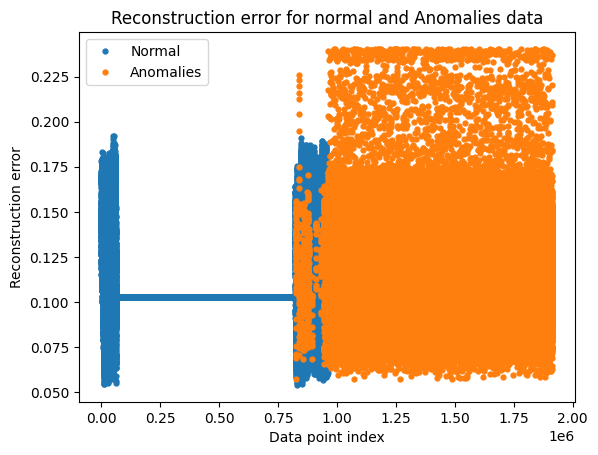

In [49]:
plt.figure(figsize=(18,10))
threshold_fixed = 0.150
groups = error_df.groupby('A')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalies" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and Anomalies data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

#### Calculate RMSE and MAE   

In [50]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':')
print('')
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')

The performance  of autoencoder:

Mean Absolute Error: 0.1400
Mean Square Error:0.1122
Root Mean Square Error: 0.3350



### confusion_matrix

In [61]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
threshold_fixed = 0.09
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['A'], error_df['pred']))
print(" Recall: ",recall_score(error_df['A'], error_df['pred']))
print(" Precision: ",precision_score(error_df['A'], error_df['pred']))
print(classification_report(error_df['A'], error_df['pred']))

[[  7101 183903]
 [ 25815 165755]]
 Accuracy:  0.4518236994672926
 Recall:  0.8652450801273686
 Precision:  0.4740489278094595
              precision    recall  f1-score   support

         0.0       0.22      0.04      0.06    191004
         1.0       0.47      0.87      0.61    191570

    accuracy                           0.45    382574
   macro avg       0.34      0.45      0.34    382574
weighted avg       0.35      0.45      0.34    382574



<Figure size 400x400 with 0 Axes>

In [58]:
from sklearn.metrics import precision_score, recall_score
# Calculate precision
precision = precision_score(error_df['A'], error_df['pred'])

# Calculate recall
recall = recall_score(error_df['A'], error_df['pred'])

# Print the precision and recall scores
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6434512900042295
Recall: 0.02382418959127212


#### Mean p-Powered Error for auto encoder
- To enhance the perfomance of reall and precision   

In [64]:
test_x_predictions2 = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions2, 4), axis=1)
error_df_mean_power = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)
error_df_mean_power.head()

11956/11956 [==============================] - 17s 1ms/step


,Reconstruction_error,A
874686,0.234898,0.0
853379,0.048925,0.0
1330364,0.081443,1.0
1534496,0.048640,1.0
192080,0.121266,0.0


In [65]:
# find the maximum of each column using reconstruction error
maxValues2 = error_df_mean_power.max()

print(maxValues2)

Reconstruction_error    0.411809
A                       1.000000
dtype: float64


In [67]:

# To identify the maximum and minimum data point for identifying bins
import tensorflow as tf
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss2 = tf.keras.losses.mse(test_x_predictions2, x_good_test)
trainloss2=pd.DataFrame(train_loss2)
trainloss2.describe()


,0
count,382574.000000
mean,0.112245
std,0.020510
min,0.054037
25%,0.102732
50%,0.102732
75%,0.124984
max,0.240294


In [74]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
threshold_fixed = 0.16
pred_y = [1 if e > threshold_fixed else 0 for e in error_df_mean_power.Reconstruction_error.values]
error_df_mean_power['pred'] =pred_y
conf_matrix = confusion_matrix(error_df_mean_power.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# sns.heatmap(conf_matrix, xticklabels=df1.A, yticklabels=df1.A, annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show()

# print classification report
#print(classification_report(error_df.A, pred_y)

# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df_mean_power['A'], error_df_mean_power['pred']))
print(" Recall: ",recall_score(error_df['A'], error_df['pred']))
print(" Precision: ",precision_score(error_df['A'], error_df['pred']))
# print classification report
print(classification_report(error_df_mean_power['A'], error_df_mean_power['pred']))

[[176649  14355]
 [115212  76358]]
 Accuracy:  0.6613282659041126
 Recall:  0.8652450801273686
 Precision:  0.4740489278094595
              precision    recall  f1-score   support

         0.0       0.61      0.92      0.73    191004
         1.0       0.84      0.40      0.54    191570

    accuracy                           0.66    382574
   macro avg       0.72      0.66      0.64    382574
weighted avg       0.72      0.66      0.64    382574



<Figure size 400x400 with 0 Axes>